In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing import image
import tensorflow as tf
import PIL
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import models

In [ ]:
# Assuming you have a dataset containing plant leaf images for 10 different classes
train_dir = '/content/drive/MyDrive/Tomato Leaf Disease'
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Assuming you have a dataset containing plant leaf images for 10 different classes
val_dir = '/content/drive/MyDrive/Tomato Leaf Disease'
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(train_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 10000 images belonging to 10 classes.


In [ ]:
validation_generator = valid_datagen.flow_from_directory(
    os.path.join(val_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 1000 images belonging to 10 classes.


In [ ]:
# Create the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model = models.Sequential()


# Stage 1
model.add(layers.Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 2
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 3
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 4
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 5
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 6
model.add(layers.Flatten())
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 4096, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
313/313 [==============================] - 6702s 21s/step - loss: 1.3979 - accuracy: 0.5387 - val_loss: 0.9799 - val_accuracy: 0.6780
Epoch 2/10
313/313 [==============================] - 150s 478ms/step - loss: 0.8602 - accuracy: 0.7093 - val_loss: 0.9420 - val_accuracy: 0.6760
Epoch 3/10
313/313 [==============================] - 149s 475ms/step - loss: 0.7210 - accuracy: 0.7529 - val_loss: 0.7388 - val_accuracy: 0.7360
Epoch 4/10
313/313 [==============================] - 150s 479ms/step - loss: 0.6549 - accuracy: 0.7741 - val_loss: 0.8673 - val_accuracy: 0.6990
Epoch 5/10
313/313 [==============================] - 149s 477ms/step - loss: 0.6174 - accuracy: 0.7860 - val_loss: 0.7003 - val_accuracy: 0.7560
Epoch 6/10
313/313 [==============================] - 150s 478ms/step - loss: 0.5757 - accuracy: 0.8031 - val_loss: 0.6906 - val_accuracy: 0.7600
Epoch 7/10
313/313 [==============================] - 150s 479ms/step - loss: 0.5484 - accuracy: 0.8111 - val_loss: 0.6679 - 

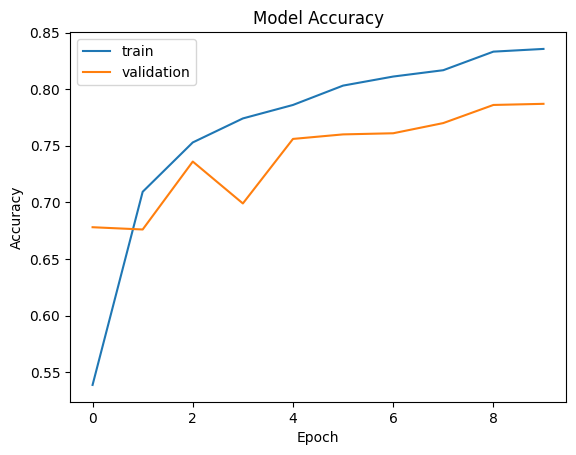

In [ ]:
# Plot the accuracy graphs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Save the trained model
model.save('plant_leaf_disease_detection_model.h5')

In [ ]:
# Function to classify an input image
def classify_image(image_path,model):
    model = load_model('plant_leaf_disease_detection_model.h5')

    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.array([img_array])
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = train_generator.class_indices

    # Inverse mapping of class indices to class labels
    class_label = {v: k for k, v in class_label.items()}
    predicted_class = class_label[class_index]

    print("Predicted class:", predicted_class)

In [ ]:
# Load the trained model
model = load_model('plant_leaf_disease_detection_model.h5')

In [ ]:
# Example2 usage
input_image_path1 = '/content/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG'

1/1 [==============================] - 1s 796ms/step
Predicted class: Tomato___healthy
None


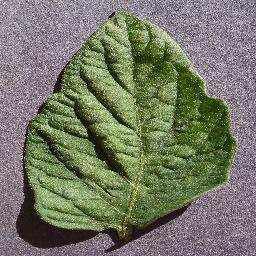

In [ ]:
print(classify_image(input_image_path1,model))
PIL.Image.open(str(input_image_path1))

In [ ]:
input_image_path2='/content/ts.jpg'

1/1 [==============================] - 0s 400ms/step
Predicted class: Tomato___Tomato_mosaic_virus
None


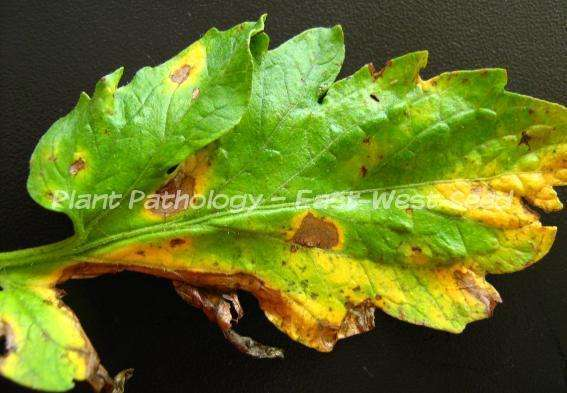

In [ ]:
print(classify_image(input_image_path2,model))
PIL.Image.open(str(input_image_path2))